<a href="https://colab.research.google.com/github/Dharungit/State-crime-prediction/blob/main/Final_project_GatewaySolutons_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project Gateway Solutions AI Intern**
Name: Dharun 

Rollnum: 19CS033 



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,median_absolute_error,r2_score as r2

In [ ]:
stateCrime = pd.read_csv('/content/drive/MyDrive/Datasets/state_crime.csv')
stateCrime.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,5.7,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,11.7,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [ ]:
le_st = LabelEncoder()
stateCrime['state'] = le_st.fit_transform(stateCrime['State'])
stateCrime = stateCrime.drop(['State'],axis=1)
stateCrime['state']

In [ ]:
stateCrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          2751 non-null   object 
 1   Year                           2751 non-null   int64  
 2   Data.Population                2751 non-null   int64  
 3   Data.Rates.Property.All        2751 non-null   float64
 4   Data.Rates.Property.Burglary   2751 non-null   float64
 5   Data.Rates.Property.Larceny    2751 non-null   float64
 6   Data.Rates.Property.Motor      2751 non-null   float64
 7   Data.Rates.Violent.All         2751 non-null   float64
 8   Data.Rates.Violent.Assault     2751 non-null   float64
 9   Data.Rates.Violent.Murder      2751 non-null   float64
 10  Data.Rates.Violent.Rape        2751 non-null   float64
 11  Data.Rates.Violent.Robbery     2751 non-null   float64
 12  Data.Totals.Property.All       2751 non-null   i

In [ ]:
stateCrime.isnull().sum()

Year                             0
Data.Population                  0
Data.Rates.Property.All          0
Data.Rates.Property.Burglary     0
Data.Rates.Property.Larceny      0
Data.Rates.Property.Motor        0
Data.Rates.Violent.All           0
Data.Rates.Violent.Assault       0
Data.Rates.Violent.Murder        0
Data.Rates.Violent.Rape          0
Data.Rates.Violent.Robbery       0
Data.Totals.Property.All         0
Data.Totals.Property.Burglary    0
Data.Totals.Property.Larceny     0
Data.Totals.Property.Motor       0
Data.Totals.Violent.All          0
Data.Totals.Violent.Assault      0
Data.Totals.Violent.Murder       0
Data.Totals.Violent.Rape         0
Data.Totals.Violent.Robbery      0
state                            0
dtype: int64

In [ ]:
stateCrime.duplicated().sum()

0

# *Data Visualization*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


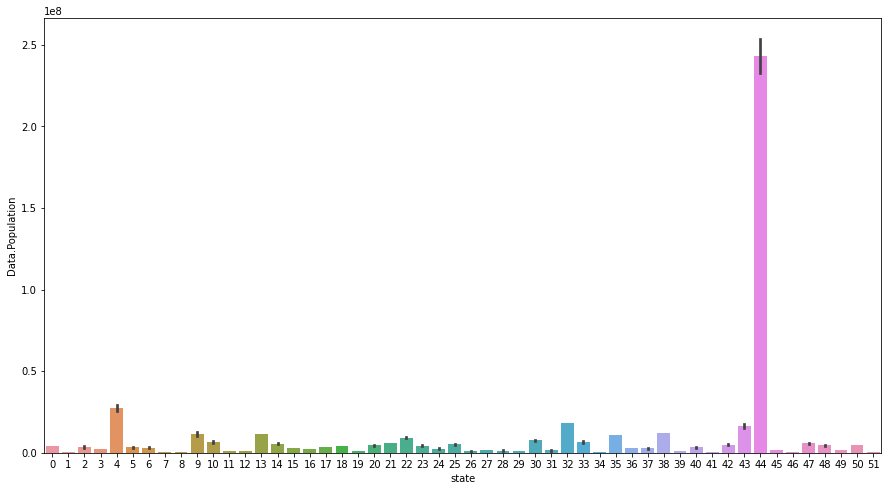

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(stateCrime['state'],stateCrime['Data.Population'])
plt.show()

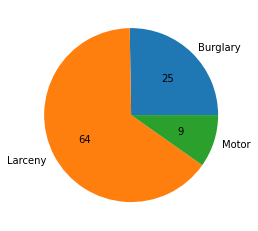

In [ ]:
a = [stateCrime['Data.Rates.Property.Burglary'].mean(),stateCrime['Data.Rates.Property.Larceny'].mean(),stateCrime['Data.Rates.Property.Motor'].mean()]
b = ['Burglary','Larceny','Motor']
plt.pie(a,labels=b,autopct="%d")
plt.show()

# *Data Training and Testing*

In [ ]:
x = stateCrime[['state','Year','Data.Population','Data.Totals.Property.Burglary','Data.Totals.Property.Larceny','Data.Totals.Property.Motor','Data.Rates.Property.Burglary','Data.Rates.Property.Larceny','Data.Rates.Property.Motor','Data.Rates.Violent.Assault','Data.Rates.Violent.Murder','Data.Rates.Violent.Rape','Data.Rates.Violent.Robbery','Data.Totals.Property.Motor','Data.Totals.Property.Larceny','Data.Totals.Property.Burglary','Data.Totals.Violent.Robbery','Data.Totals.Violent.Rape','Data.Totals.Violent.Murder','Data.Totals.Violent.Assault']]
y = stateCrime['Data.Totals.Property.All']+stateCrime['Data.Totals.Violent.All']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=10)

In [ ]:
print(f'x_train = {len(x_train)}, y_train = {len(y_train)}, x_test= {len(x_test)}, y_test = {len(y_test)}')

x_train = 1650, y_train = 1650,x_test= 1101, y_test = 1101


#*Linear Regression* 

In [ ]:
Lreg = LinearRegression()
Lreg.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = Lreg.predict(x_test)

In [ ]:
y_pred[:10]

array([ 14028.85579074, 120315.48915243, 125923.64141516,  72441.17520784,
       546068.56879154,  49138.60116121, 166253.55116238,  82858.43746739,
       213134.28993689, 170962.17694085])

In [ ]:
Train_score = Lreg.score(x_train,y_train)*100
Test_score = Lreg.score(x_test,y_test)*100
print(f'Train score = {Train_score}, Test score = {Test_score}')

Train score = 99.99999999379916, Test score = 99.99999999857941


In [ ]:
lin_mean_ae = mean_absolute_error(y_test,y_pred)
lin_median_ae = median_absolute_error(y_test,y_pred)
print(f'Mean absolute error = {lin_mean_ae}, Median absolute error = {lin_median_ae}')

Mean absolute error = 0.9335431398093526, Median absolute error = 0.4312084629200399


In [ ]:
Linear_r2 = r2(y_test,y_pred)*100
print(f'R square score: {r2(y_test,y_pred)*100}')

R square score: 99.99999999857943


# *DecisionTree Regression*

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
print(f'x_train shape = {x_train.shape}, y_train shape = {y_train.shape}')

x_train shape = (1650, 20), y_train shape = (1650,)


In [ ]:
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
Train_score = clf.score(x_train,y_train)*100
Test_score = clf.score(x_test,y_test)*100
print(f'Train score = {Train_score}, Test score = {Test_score}')

Train score = 100.0, Test score = 99.79383858162488


In [ ]:
Dtree_r2 = r2(y_test,y_pred)*100
print(f'R square score: {r2(y_test,y_pred)*100}')

R square score: 99.79383858162488


In [ ]:
Dtree_mean_ae = mean_absolute_error(y_test,y_pred)
Dtree_median_ae = median_absolute_error(y_test,y_pred)
print(f'Mean absolute error = {Dtree_mean_ae}, Median absolute error = {Dtree_median_ae}')

Mean absolute error = 14224.653042688466, Median absolute error = 3661.0


# *Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf=RandomForestRegressor(max_depth=2,n_estimators=100,random_state=0)
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
Train_score = clf.score(x_train,y_train)*100
Test_score = clf.score(x_test,y_test)*100
print(f'Train score = {Train_score}, Test score = {Test_score}')

Train score = 97.7726093538174, Test score = 97.33873845619847


In [ ]:
random_r2 = r2(y_test,y_pred)*100
print(f'R square score: {r2(y_test,y_pred)*100}')

R square score: 97.33873845619847


In [ ]:
Random_mean_ae = mean_absolute_error(y_test,y_pred)
Random_median_ae = median_absolute_error(y_test,y_pred)
print(f'Mean absolute error = {Random_mean_ae}, Median absolute error = {Random_median_ae}')

Mean absolute error = 132764.1800087582, Median absolute error = 104368.62094331163


# *KNN* 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
clf=KNeighborsRegressor()
clf.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
y_pre=clf.predict(x_test)

In [ ]:
Train_score = clf.score(x_train,y_train)*100
Test_score = clf.score(x_test,y_test)*100
print(f'Train score = {Train_score}, Test score = {Test_score}')

Train score = 99.69620555576519, Test score = 99.6134024600942


In [ ]:
knn_r2 = r2(y_test,y_pred)*100
print(f'R square score: {r2(y_test,y_pred)*100}')

R square score: 97.33873845619847


In [ ]:
Knn_mean_ae = mean_absolute_error(y_test,y_pred)
Knn_median_ae = median_absolute_error(y_test,y_pred)
print(f'Mean absolute error = {Knn_mean_ae}, Median absolute error = {Knn_median_ae}')

Mean absolute error = 132764.1800087582, Median absolute error = 104368.62094331163


# *SVM*

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler    

In [ ]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [ ]:
clf=svm.SVR(C=1,gamma=0.01)
clf.fit(x_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pre=clf.predict(x_test)

In [ ]:
Train_score = clf.score(x_train,y_train)*100
Test_score = clf.score(x_test,y_test)*100
print(f'Train score = {Train_score}, Test score = {Test_score}')

Train score = -3.870988614244375, Test score = -3.4109533679841153


In [ ]:
svm_r2 = r2(y_test,y_pred)*100
print(f'R square score: {r2(y_test,y_pred)*100}')

R square score: 97.33873845619847


In [ ]:
Svm_mean_ae = mean_absolute_error(y_test,y_pred)
Svm_median_ae = median_absolute_error(y_test,y_pred)
print(f'Mean absolute error = {Svm_mean_ae}, Median absolute error = {Svm_median_ae}')

Mean absolute error = 132764.1800087582, Median absolute error = 104368.62094331163


# **Accuracy Check**


In [ ]:
Mean_accuracy = {'Linear Regression':lin_mean_ae,'Decision Tree':Dtree_mean_ae,'Random Forest':Random_mean_ae,'KNN':Knn_mean_ae,'SVM':Svm_mean_ae}
Median_accuracy = {'Linear Regression':lin_median_ae,'Decision Tree':Dtree_median_ae,'Random Forest':Random_median_ae,'KNN':Knn_median_ae,'SVM':Svm_median_ae}
R2_accuracy = {'Linear Regression':Linear_r2,'Decision Tree':Dtree_r2,'Random Forest':random_r2,'KNN':knn_r2,'SVM':svm_r2}

In [ ]:
print(f'Lowest Mean Ansolute Error {min(Mean_accuracy)}')
print()
print(f'Lowest Median Ansolute Error {min(Median_accuracy)}')
print()
print(f'Lowest R square value {min(R2_accuracy)}')

Lowest Mean Ansolute Error Decision Tree

Lowest Median Ansolute Error Decision Tree

Lowest R square value Decision Tree


# **Results**

*From the above results it is proven that **Decision Tree Regression Algorithm** has high accurucy for predicting crimes*